In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df[df == '?']=np.nan

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [9]:
x=df.drop(['income'],axis=1)
y=df['income']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=0)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
leb=LabelEncoder()
for feature in categorical:
    x_train[feature]=leb.fit_transform(x_train[feature])
    x_test[feature]=leb.transform(x_test[feature])

In [13]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=pd.DataFrame(scalar.fit_transform(x_train),columns=x.columns)
x_test=pd.DataFrame(scalar.transform(x_test),columns=x.columns)

In [14]:
x_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.600478,-1.494279,-0.332263,1.133894,-0.402341,-0.782234,2.214196,0.39298,-1.430470,-0.145189,-0.217407,-1.662414,0.262317
1,0.028248,-1.884720,0.438778,0.184396,-0.423425,-0.402341,-0.026696,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.200753,0.262317
2,0.247956,-0.090641,0.045292,1.217715,-0.034095,0.926666,-0.782234,-0.276689,0.39298,-1.430470,-0.145189,-0.217407,-0.038346,0.262317
3,-0.850587,-1.884720,0.793152,0.184396,-0.423425,0.926666,-0.530388,0.968753,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317
4,-0.044989,-2.781760,-0.853275,0.442726,1.523223,-0.402341,-0.782234,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score

In [16]:
logre=LogisticRegression()
logre.fit(x_train,y_train)
y_pred=logre.predict(x_test)

In [17]:
print(accuracy_score(y_test,y_pred))

0.8216808271061521


In [18]:
f1_score(y_test,y_pred,pos_label='<=50K')

0.8891575464494782

In [19]:
f1_score(y_test,y_pred,pos_label='>50K')

0.54421768707483

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       <=50K       0.94      0.84      0.89      8306
        >50K       0.44      0.71      0.54      1463

    accuracy                           0.82      9769
   macro avg       0.69      0.78      0.72      9769
weighted avg       0.87      0.82      0.84      9769



In [24]:
from sklearn.decomposition import PCA
pca=PCA()
X_train = pca.fit_transform(x_train)
pca.explained_variance_ratio_

array([0.14757168, 0.10182915, 0.08147199, 0.07880174, 0.07463545,
       0.07274281, 0.07009602, 0.06750902, 0.0647268 , 0.06131155,
       0.06084207, 0.04839584, 0.04265038, 0.02741548])

In [25]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 12


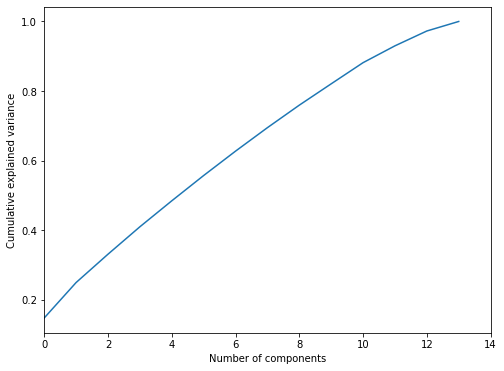

In [26]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [27]:
from sklearn import feature_selection

In [28]:
dir(feature_selection)

['GenericUnivariateSelect',
 'RFE',
 'RFECV',
 'SelectFdr',
 'SelectFpr',
 'SelectFromModel',
 'SelectFwe',
 'SelectKBest',
 'SelectPercentile',
 'SelectorMixin',
 'SequentialFeatureSelector',
 'VarianceThreshold',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_from_model',
 '_mutual_info',
 '_rfe',
 '_sequential',
 '_univariate_selection',
 '_variance_threshold',
 'chi2',
 'f_classif',
 'f_oneway',
 'f_regression',
 'mutual_info_classif',
 'mutual_info_regression']

In [29]:
from sklearn.feature_selection import SelectFromModel,SelectKBest,SelectPercentile

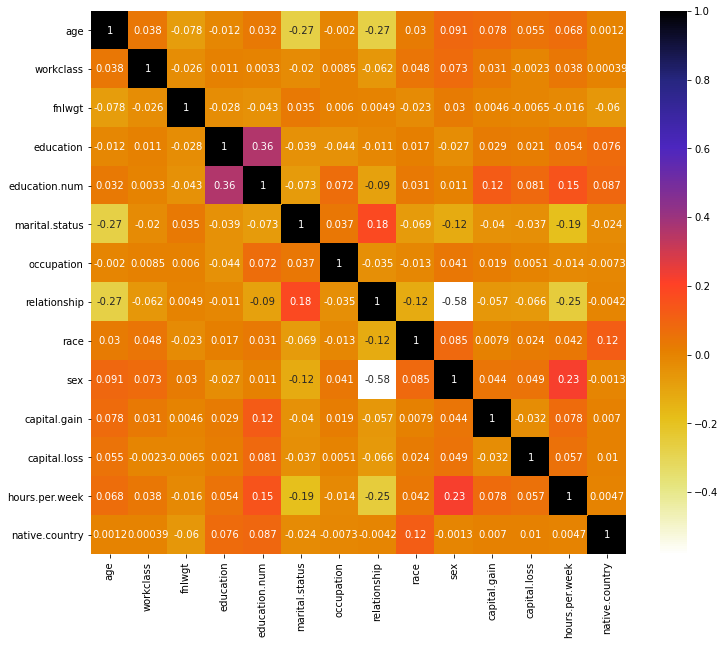

In [30]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [32]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=pd.Series(mutual_info_classif(x_train,y_train))
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

relationship      0.116616
marital.status    0.109657
capital.gain      0.083280
age               0.071621
education.num     0.069987
education         0.064400
occupation        0.052618
hours.per.week    0.042247
capital.loss      0.034158
sex               0.026399
fnlwgt            0.024624
workclass         0.013089
native.country    0.006815
race              0.005247
dtype: float64

In [33]:
from sklearn.feature_selection import SelectKBest

In [38]:
sel=SelectKBest(mutual_info_classif,k=10)
sel.fit(x_train,y_train)
x_train.columns[sel.get_support()]

Index(['age', 'education', 'education.num', 'marital.status', 'occupation',
       'relationship', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [49]:
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1",solver='saga'),max_features=10)
embeded_lr_selector.fit(x_train, y_train)
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = x_train.loc[:,embeded_lr_support].columns.tolist()
embeded_lr_feature
#print(str(len(embeded_lr_feature)), 'selected features')

['age',
 'workclass',
 'education.num',
 'marital.status',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [52]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100))
embeded_rf_selector.fit(x_train,y_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = x_train.loc[:,embeded_rf_support].columns.tolist()
embeded_rf_feature

['age',
 'fnlwgt',
 'education.num',
 'marital.status',
 'relationship',
 'capital.gain',
 'hours.per.week']

In [52]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100))
embeded_rf_selector.fit(x_train,y_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = x_train.loc[:,embeded_rf_support].columns.tolist()
embeded_rf_feature

['age',
 'fnlwgt',
 'education.num',
 'marital.status',
 'relationship',
 'capital.gain',
 'hours.per.week']

In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), step=10, verbose=5)
rfe_selector.fit(x_train, y_train)
rfe_support = rfe_selector.get_support()
rfe_feature = x_train.loc[:,rfe_support].columns.tolist()
rfe_feature

Fitting estimator with 14 features.


['age',
 'education.num',
 'marital.status',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week']